In [61]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dotenv
import os

In [62]:
os.getcwd()

'C:\\Users\\dwagn\\git'

In [63]:
os.chdir('C:\\Users\\dwagn\\Desktop')
dotenv.load_dotenv()
CLIENT_ID = os.getenv('spotify-client-id')
CLIENT_SECRET = os.getenv('spotify-client-secret')
os.chdir('C:\\Users\\dwagn\\git')

In [64]:
dotenv.load_dotenv()

True

In [65]:
AUTH_URL = 'https://accounts.spotify.com/api/token'


auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET
})

auth_response_data = auth_response.json()
access_token = auth_response_data['access_token']

if auth_response.status_code == 200:
    print ('Success!')
else:
    print ('API access rejected')

Success!


In [66]:
headers = {'Authorization': 'Bearer {}'.format(access_token)}

url = 'https://api.spotify.com/v1/'

# Track ID from the URI
track_id = '3mfJT8Ae3pME7OmluGNMYF'

r = requests.get(url + 'audio-features/' + track_id, headers=headers)

In [67]:
r = r.json()
r

{'danceability': 0.725,
 'energy': 0.385,
 'key': 6,
 'loudness': -14.283,
 'mode': 0,
 'speechiness': 0.0384,
 'acousticness': 0.471,
 'instrumentalness': 0,
 'liveness': 0.124,
 'valence': 0.809,
 'tempo': 125.138,
 'type': 'audio_features',
 'id': '3mfJT8Ae3pME7OmluGNMYF',
 'uri': 'spotify:track:3mfJT8Ae3pME7OmluGNMYF',
 'track_href': 'https://api.spotify.com/v1/tracks/3mfJT8Ae3pME7OmluGNMYF',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3mfJT8Ae3pME7OmluGNMYF',
 'duration_ms': 169867,
 'time_signature': 4}

In [107]:
# Paste artist's share link to get the artist_id
# 'https://open.spotify.com/artist/6py4uFIC7T6RdrZnH6hFYJ?si=EJXirCwjR-2y8iw8oBwYjQ'
artist_share_url = input('Paste artist spotify share link: ')
artist_id = artist_share_url.split('/')[4].split('?')[0]
print(artist_id)

Paste artist spotify share link:  https://open.spotify.com/artist/3nJWBJvK7uGvfp4iZh9CkN?si=p09Bd1QiTVigO2qxJVKfxQ


3nJWBJvK7uGvfp4iZh9CkN


In [108]:
# artist_id = '6py4uFIC7T6RdrZnH6hFYJ' # Ballyhoo!
# artist_id = '41Q0HrwWBtuUkJc7C1Rp6K' # 311

# pull albums
albums = requests.get(url + 'artists/' + artist_id + '/albums', 
                 headers=headers, 
                 params={'include_groups': 'album', 'limit': 50}).json()

In [109]:
album_names_dates = {}
for album in albums['items']:
    album_names_dates[album['name']] = album['release_date']

In [110]:
# albums['items'][0] # Pull artist name
artist_name = requests.get(url + 'artists/' + artist_id, headers=headers).json()['name']
artist_name

'Relient K'

In [111]:
%%time
track_info = []
repeat_detection = []

for i in albums['items']:

    r = requests.get(url + 'albums/' + i['id'] + '/tracks', 
        headers=headers)
    tracks = r.json()['items']
    
    for track in tracks:
        detailsr = requests.get(url + 'audio-features/' + track['id'], headers=headers).json()
        
        # combine with album info
        detailsr.update({
            'track_name': track['name'],
            'album_name': i['name'],
            'album_id': i['id'],
            'release_date': i['release_date']
        })
        
        track_info.append(detailsr)
        
    print('{} added...'.format(i['name']))


Live added...
Air for Free added...
Mmhmm10 added...
Collapsible Lung added...
Is for Karaoke added...
Forget And Not Slow Down added...
Forget And Not Slow Down added...
The Bird and the Bee Sides added...
Let It Snow Baby...Let It Reindeer added...
Five Score and Seven Years Ago added...
Mmhmm added...
Two Lefts Don't Make a Right...But Three Do (Gold Edition) added...
The Anatomy of the Tongue in Cheek added...
Relient K added...
Wall time: 33.5 s


In [115]:
df = pd.DataFrame(track_info)
# df

In [116]:
df['release_date'] = pd.to_datetime(df['release_date'])
# df = df.sort_values(by='release_date')

# sloppily move last couple columns to the front
cols = df.columns.tolist()
cols = cols[-4:] + cols[:-4]
df = df[cols]

In [117]:
# Shorten long album names
for name in df['album_name']:
    if len(name) > 25:
        short_name = name[0:25]
        df = df.replace(name, short_name)

In [178]:
# remove tracks with na values, if any
# can't simply dropna(), since there is an error column >:(
na_tracks = []
if 'error' in df.columns:
    for track in df[~df['error'].isna()]['track_name']:
        
        na_tracks.append(track)
na_tracks

Crayons Can Melt on Us for All I Care


['Crayons Can Melt on Us for All I Care']

In [195]:
[x for x in df['error'] if str(x) != 'nan']
    

[{'status': 404, 'message': 'analysis not found'}]

In [145]:
df.head(1)

,album_name,album_id,release_date,error,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name
0,Live,7KR1nrIbMe8HeKvlIKsj9h,2020-04-24,NaN,0.358,0.855,8.0,-6.156,1.0,0.0469,...,0.506,83.976,audio_features,7pTcBKuWHDjo0PjC08xWA7,spotify:track:7pTcBKuWHDjo0PjC08xWA7,https://api.spotify.com/v1/tracks/7pTcBKuWHDjo...,https://api.spotify.com/v1/audio-analysis/7pTc...,240969.0,4.0,"Forget and Not Slow Down - Live at Rocketown, ..."


In [85]:
df['duration_mins'] = (df['duration_ms']/60000).round(2)

def toMinsSecs(time):
    minutes = int(time)
    seconds = int((time - minutes) * 60)
    if seconds < 10:
        seconds = str(seconds).zfill(2) # adds zeros before single seconds
    full = '{}:{}'.format(minutes, seconds)
    return full
df['duration_full'] = df['duration_mins'].map(lambda x: toMinsSecs(x))
df.head(5)

,track_name,album_name,album_id,release_date,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,duration_mins,duration_full
0,Beautiful Disaster - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.343,0.806,1,-11.353,0,0.0936,...,169.943,audio_features,38znMaMurMhYmgYvMDQotf,spotify:track:38znMaMurMhYmgYvMDQotf,https://api.spotify.com/v1/tracks/38znMaMurMhY...,https://api.spotify.com/v1/audio-analysis/38zn...,248000,4,4.13,4:07
1,All Mixed Up - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.466,0.765,1,-11.978,1,0.1050,...,183.889,audio_features,6P7geqcpl7VcD3eFmKTAIR,spotify:track:6P7geqcpl7VcD3eFmKTAIR,https://api.spotify.com/v1/tracks/6P7geqcpl7Vc...,https://api.spotify.com/v1/audio-analysis/6P7g...,232750,4,3.88,3:52
2,Silver - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.544,0.881,1,-9.936,1,0.0782,...,96.965,audio_features,3T8PmznIDAnGTzd3PltUUP,spotify:track:3T8PmznIDAnGTzd3PltUUP,https://api.spotify.com/v1/tracks/3T8PmznIDAnG...,https://api.spotify.com/v1/audio-analysis/3T8P...,168084,4,2.80,2:47
3,Come Original - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.432,0.857,7,-11.565,1,0.0676,...,187.884,audio_features,3V07MqrFuz5dJm6baCWz8m,spotify:track:3V07MqrFuz5dJm6baCWz8m,https://api.spotify.com/v1/tracks/3V07MqrFuz5d...,https://api.spotify.com/v1/audio-analysis/3V07...,228000,4,3.80,3:47
4,Gap - Live,Mardi Gras 2020 (Live),6rHYji8tiB2Jfo3P1Uegvv,2021-01-15,0.575,0.854,7,-11.271,1,0.0515,...,106.998,audio_features,50qMMcQDAukXhh07xBKCh7,spotify:track:50qMMcQDAukXhh07xBKCh7,https://api.spotify.com/v1/tracks/50qMMcQDAukX...,https://api.spotify.com/v1/audio-analysis/50qM...,138500,4,2.31,2:18


In [30]:
# subset by album
by_album = df.groupby('album_name').agg({'danceability':'mean',
                                         'energy':'mean',
                                         'loudness':'mean',
                                         'speechiness':'mean',
                                         'acousticness':'mean',
                                         'instrumentalness':'mean',
                                         'liveness':'mean',
                                         'valence':'mean',
                                         'tempo':'mean',
                                         'time_signature':'mean',
                                         'duration_ms':'sum',
                                         'duration_mins':'sum'}).round(3).reset_index()
by_album

,album_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,duration_mins
0,Air for Free,0.445,0.744,-7.292,0.043,0.125,0.058,0.224,0.525,127.653,3.938,3566228.0,59.44
1,Collapsible Lung,0.670,0.681,-6.878,0.046,0.035,0.004,0.179,0.666,117.169,4.000,2138287.0,35.63
2,Five Score and Seven Year,0.443,0.832,-4.413,0.048,0.100,0.000,0.146,0.397,152.487,3.692,3067414.0,51.13
3,Forget And Not Slow Down,0.479,0.733,-6.825,0.061,0.184,0.070,0.198,0.440,134.348,4.000,5475720.0,91.22
4,Is for Karaoke,0.559,0.731,-6.182,0.041,0.006,0.004,0.155,0.437,128.156,4.000,3027402.0,50.47
5,Let It Snow Baby...Let It,0.451,0.584,-7.747,0.037,0.358,0.001,0.160,0.453,128.671,3.941,2875600.0,47.93
6,Live,0.447,0.820,-7.025,0.068,0.027,0.000,0.745,0.474,121.665,3.933,3663409.0,61.07
7,Mmhmm,0.449,0.828,-4.811,0.055,0.070,0.000,0.167,0.405,138.424,3.929,3027652.0,50.46
8,Mmhmm10,0.454,0.756,-5.708,0.053,0.165,0.048,0.158,0.385,134.655,3.950,4132687.0,68.88
9,Relient K,0.449,0.694,-6.028,0.049,0.008,0.127,0.247,0.584,114.000,3.929,2777561.0,46.30


In [31]:
# remove extra/repeated albums
# for repeat albums, go through and pick shortest album

albs_to_keep = {}
for name in by_album['album_name']:
    trim_name = name.split('(')[0].strip()
    alb_len = len(df[df['album_name'] == '{}'.format(name)])
    print(trim_name,':',alb_len)
#     if trim_name.upper() in albs_to_keep and :
        # compare with one in detector. If longer, then swap
    for i in albs_to_keep.keys():
        if (name[0:5] in i) & (alb_len <= albs_to_keep[i]):
            albs_to_keep[i] = 0
    albs_to_keep[name] = alb_len
albs_to_keep = {x:y for x,y in albs_to_keep.items() if y != 0}

by_album = by_album[by_album['album_name'].isin(albs_to_keep)].reset_index(drop=True)

Air for Free : 16
Collapsible Lung : 11
Five Score and Seven Year : 14
Forget And Not Slow Down : 32
Is for Karaoke : 14
Let It Snow Baby...Let It : 17
Live : 15
Mmhmm : 14
Mmhmm10 : 20
Relient K : 14
The Anatomy of the Tongue : 17
The Bird and the Bee Side : 20
Two Lefts Don't Make a Ri : 15


[Text(0, 0, 'Collapsible Lung'),
 Text(1, 0, 'Relient K'),
 Text(2, 0, 'Let It Snow Baby...Let It'),
 Text(3, 0, 'Mmhmm'),
 Text(4, 0, 'Is for Karaoke'),
 Text(5, 0, 'Five Score and Seven Year'),
 Text(6, 0, 'The Bird and the Bee Side'),
 Text(7, 0, 'The Anatomy of the Tongue'),
 Text(8, 0, "Two Lefts Don't Make a Ri"),
 Text(9, 0, 'Air for Free'),
 Text(10, 0, 'Live'),
 Text(11, 0, 'Mmhmm10'),
 Text(12, 0, 'Forget And Not Slow Down')]

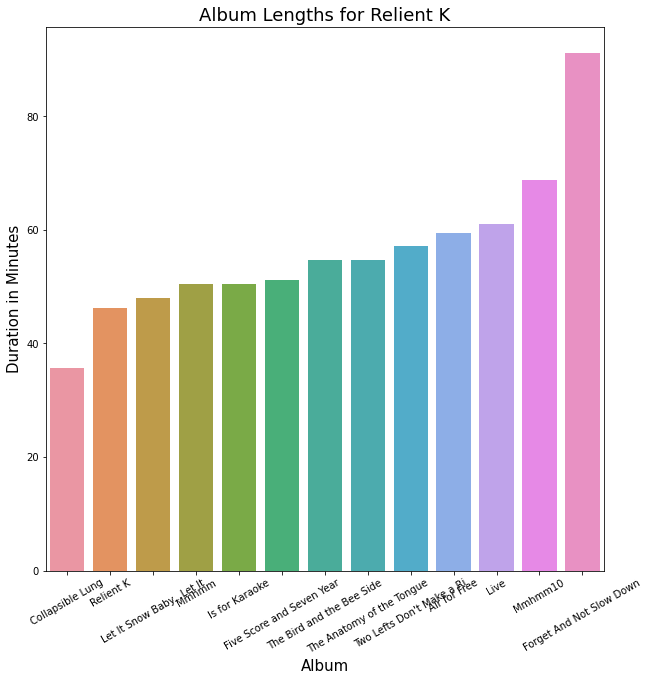

In [32]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=by_album, 
                 x='album_name', 
                 y='duration_mins',
                order = by_album.sort_values('duration_mins').album_name)
plt.xlabel("Album", size=15)
plt.ylabel("Duration in Minutes", size=15)
plt.title("Album Lengths for {artist}".format(artist = artist_name), size=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [33]:
corr_mat = by_album.corr(method='pearson').round(2)
sorted_mat = corr_mat.unstack().sort_values() \
             [:-(len(by_album.columns))-1] \
             [::2]
sorted_mat = sorted_mat.sort_values(ascending=False)
top_5_corr = sorted_mat.head(5)
bottom_5_corr = sorted_mat.tail(5)
print('Top 5 positive correlations:\n{}\n\nTop 5 negative correlations:\n{}' \
      .format(top_5_corr, bottom_5_corr))

Top 5 positive correlations:
loudness      energy          0.67
valence       danceability    0.50
liveness      speechiness     0.39
valence       speechiness     0.37
acousticness  tempo           0.34
dtype: float64

Top 5 negative correlations:
duration_mins   valence    -0.43
duration_ms     valence    -0.43
time_signature  energy     -0.44
                loudness   -0.45
acousticness    energy     -0.55
dtype: float64


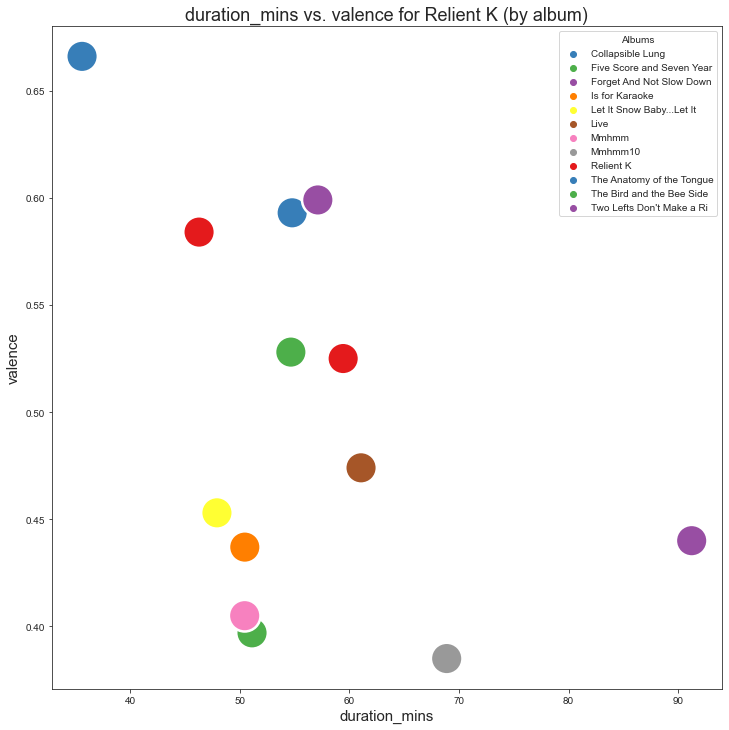

In [44]:
# The largest negative correlation for this artist
var1 = str(bottom_5_corr[0:1]).split()[0]
var2 = str(bottom_5_corr[0:1]).split()[1]

plt.figure(figsize=(10, 10))
plt.title("{var1} vs. {var2} for {artist} (by album)".format(var1 = var1,
                                                  var2 = var2,
                                                  artist = artist_name), size=18)
plt.tight_layout()
ax = sns.scatterplot(data=by_album, 
                 x=var1, 
                 y=var2,
                 s=1000,
                 marker='o',
                 hue='album_name',
                 palette='Set1')
sns.set_style("ticks")
plt.xlabel(var1, size=15)
plt.ylabel(var2, size=15)

ax.legend(h[1:len(album_names_dates)+1], 
          labs[1:int(len(album_names_dates))+1], loc='best', title='Albums')

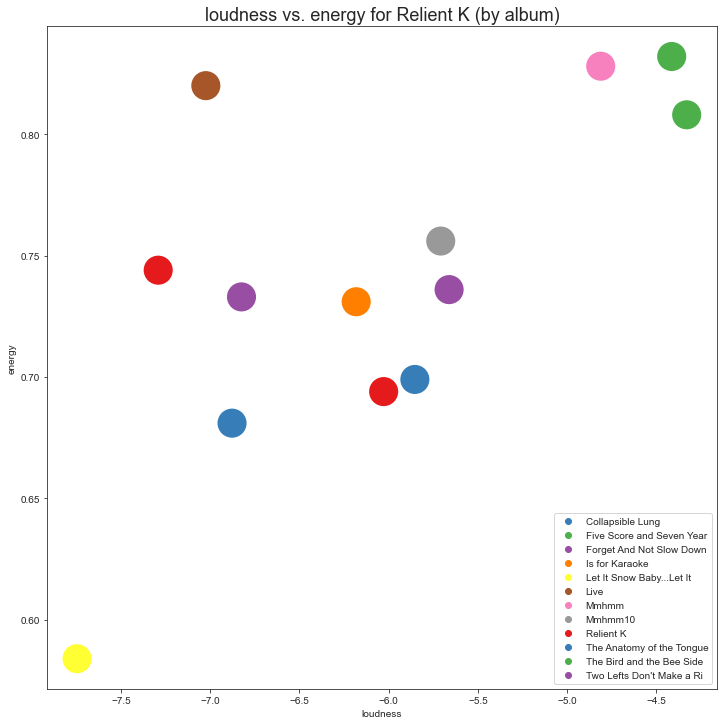

In [42]:
# The largest positive correlation for this artist
var1 = str(top_5_corr[0:1]).split()[0]
var2 = str(top_5_corr[0:1]).split()[1]

plt.figure(figsize=(10, 10))
plt.title("{var1} vs. {var2} for {artist} (by album)".format(var1 = var1,
                                                  var2 = var2,
                                                  artist = artist_name), size=18)
plt.tight_layout()
ax = sns.scatterplot(data=by_album, 
                 x=var1, 
                 y=var2,
                 s=1000,
                 hue='album_name',
                 palette='Set1')

ax.legend(h[1:len(album_names_dates)+1], 
          labs[1:int(len(album_names_dates))+1], loc='best', title=None)

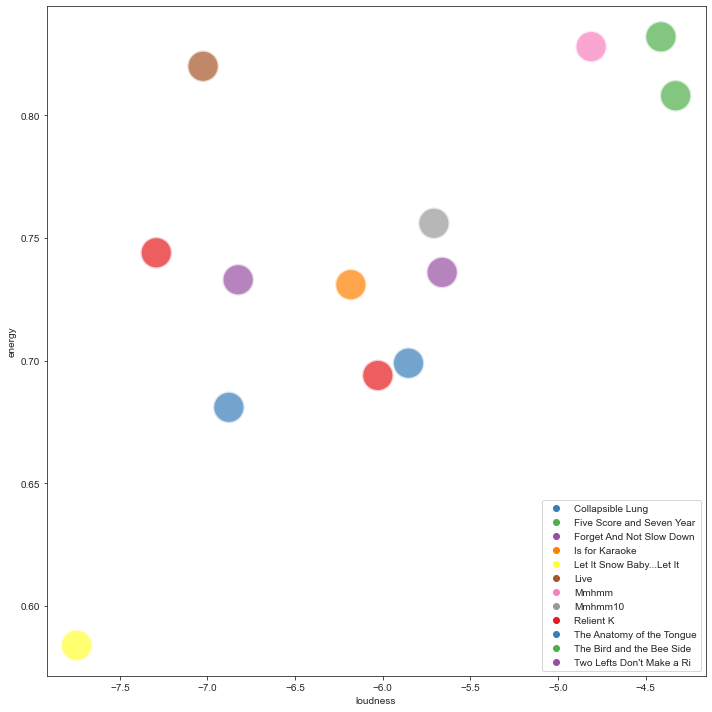

In [38]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=by_album, 
                     x='loudness', y='energy', 
                     hue='album_name', 
                     palette='Set1', 
#                      size='duration_ms',
                     s=1000,
                     sizes=(50,1000), 
                     alpha=0.7)
# plt.xlabel("Average Song Energy", size=15)
# plt.ylabel("Average Song Tempo", size=15)
# plt.title("Album Energy and Tempo for {artist}".format(artist = 'None'), size=18)
plt.tight_layout()
# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:len(album_names_dates)+1], 
          labs[1:int(len(album_names_dates))+1], loc='best', title=None)